<a href="https://colab.research.google.com/github/zedline4/100-Days-Of-ML-Code/blob/master/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('sample_data/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [8]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [9]:
df_data.duplicated().any()

False

## Descriptive Statistics

In [10]:
df_data.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [12]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [13]:
dff=df_data.groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False)

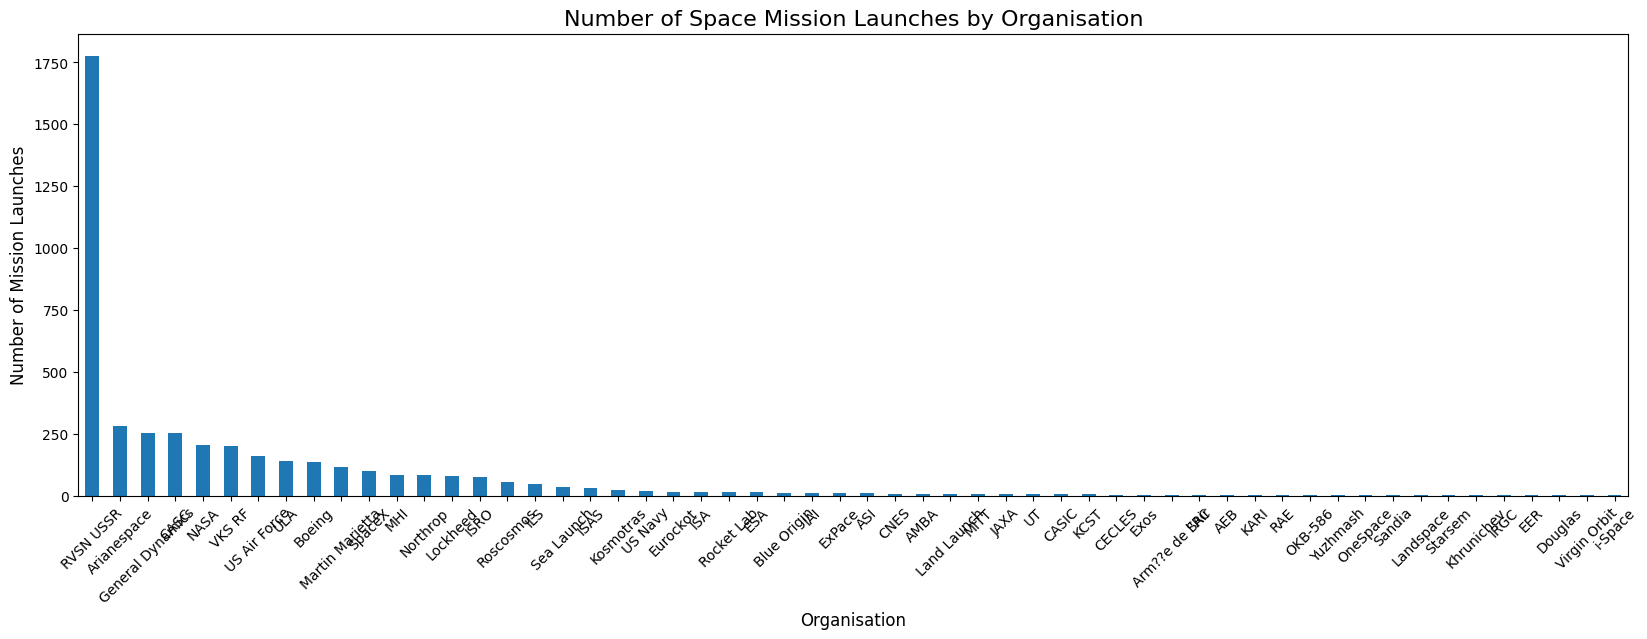

In [14]:
plt.figure(figsize=(20,6))
dff=df_data.groupby('Organisation')['Mission_Status'].count().sort_values(ascending=False).plot(kind='bar', title='Number of Space Mission Launches by Organisation')
dff.set_title('Number of Space Mission Launches by Organisation', fontsize=16)
dff.set_xlabel('Organisation', fontsize=12)
dff.set_ylabel('Number of Mission Launches', fontsize=12)

# Customize the tick labels for better readability
plt.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

# Display the plot


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [15]:
df_data['Rocket_Status'].value_counts()


StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

<Axes: title={'center': 'Active Rockets versus Retired Rockets '}>

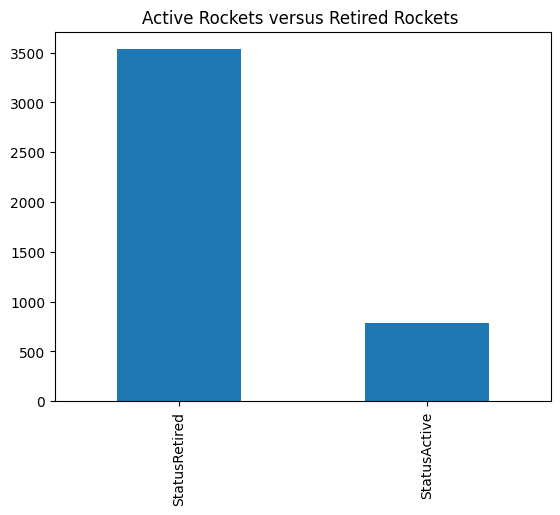

In [16]:
df_data['Rocket_Status'].value_counts().plot(kind='bar', title='Active Rockets versus Retired Rockets ')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [17]:
df_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

<Axes: title={'center': 'Status missions'}>

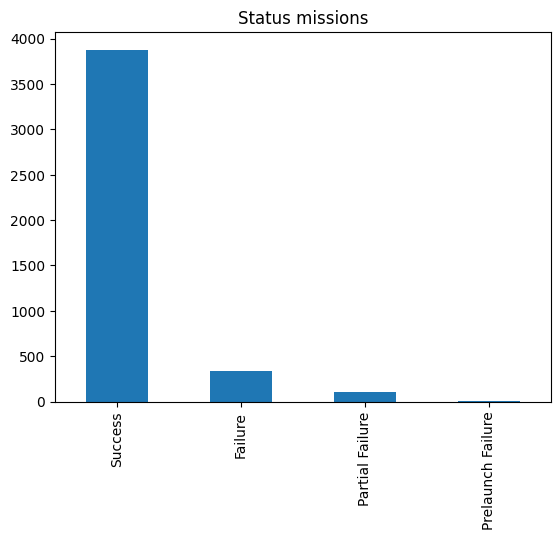

In [18]:
df_data['Mission_Status'].value_counts().plot(kind='bar', title="Status missions")

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [19]:
df_data['Price']=pd.to_numeric(df_data['Price'], errors= 'coerce' )

In [20]:
df_data['Price'].sort_values(ascending=False)

1605   450.00
1076   450.00
762    450.00
1590   450.00
737    450.00
        ...  
4319      NaN
4320      NaN
4321      NaN
4322      NaN
4323      NaN
Name: Price, Length: 4324, dtype: float64

In [21]:
df_data['Price'].max()

450.0

In [22]:
df_data['Price'].describe()

count   949.00
mean    129.80
std     143.22
min       5.30
25%      40.00
50%      62.00
75%     164.00
max     450.00
Name: Price, dtype: float64

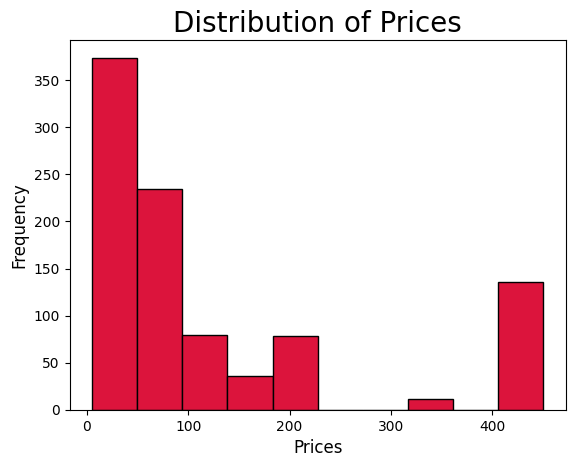

In [23]:
plt.hist(df_data['Price'].dropna().sort_values(ascending= False), bins=10, color='crimson', edgecolor='black')
plt.title("Distribution of Prices", fontsize=20)
plt.xlabel("Prices", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()




# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [24]:
df_data['Country'] = df_data['Location'].str.extract(r',\s*([^,]+)$')[0]

In [25]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [26]:
country_name_changes = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

df_data['Country'].replace(country_name_changes, inplace=True)

In [27]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [28]:
from iso3166 import countries
def get_alpha3_country_code(country_name):
    try:
        country = countries.get(country_name)
        if country:
            return country.alpha3
        else:
            return None
    except KeyError:
        return None

# Apply the function to create the Alpha3 country code column
df_data['Alpha3'] = df_data['Country'].apply(get_alpha3_country_code)

In [29]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha3
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


In [30]:
df_data['Alpha3'].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
NZL      13
ISR      11
KEN       9
AUS       6
BRA       3
Name: Alpha3, dtype: int64

In [31]:
total_lauches=df_data['Alpha3'].value_counts()
total_lauches

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
NZL      13
ISR      11
KEN       9
AUS       6
BRA       3
Name: Alpha3, dtype: int64

In [32]:
launch_counts = df_data['Alpha3'].value_counts().reset_index()
launch_counts.columns = ['Alpha3', 'TotalLaunches']

# Now use 'launch_counts' DataFrame as the data source for the choropleth map
fig = px.choropleth(launch_counts, locations='Alpha3', color='TotalLaunches',
                    color_continuous_scale='viridis',
                    projection='natural earth')
fig.show()

In [33]:
launch_counts.head()

,Alpha3,TotalLaunches
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269


# Use a Choropleth Map to Show the Number of Failures by Country


In [34]:
failure_count=df_data[df_data["Mission_Status"] == "Failure"]['Alpha3'].value_counts()

In [35]:
failure_data=failure_count.reset_index()
failure_data.columns=['Alpha3','totalfailure']
fig = px.choropleth(failure_data, locations='Alpha3', color='totalfailure',
                    color_continuous_scale='viridis',
                    projection='natural earth')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [36]:
status_counts = df_data.groupby(['Country', 'Organisation', 'Mission_Status']).size().reset_index(name='count')
status_counts.head()

,Country,Organisation,Mission_Status,count
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [37]:
fig=px.sunburst(status_counts,path=['Country','Organisation','Mission_Status'], values='count')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions.


In [38]:
Price_count=df_data['Organisation'].value_counts()
Price_count.head()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
Name: Organisation, dtype: int64

In [39]:
total_spending=df_data.groupby('Organisation')['Price'].sum().sort_values(ascending=False)
total_spending.head()

Organisation
NASA          61,200.00
Arianespace   16,345.00
ULA           14,798.00
CASC           6,340.26
SpaceX         5,444.00
Name: Price, dtype: float64

In [40]:
spend = df_data.groupby(['Country', 'Organisation'])['Price'].sum().sort_values(ascending=False)
spend.head()

Country  Organisation
USA      NASA           61,200.00
France   Arianespace    16,248.00
USA      ULA            14,798.00
China    CASC            6,340.26
USA      SpaceX          5,444.00
Name: Price, dtype: float64

In [41]:
df_data.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha3
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


In [42]:
agg_data = df_data.groupby(['Country', 'Organisation','Price']).size().reset_index(name='Count')
fig = px.sunburst(agg_data, path=['Country', 'Organisation','Price'], values='Count')
fig.show()



In [43]:
agg_data = df_data.groupby(['Country', 'Organisation','Mission_Status','Price']).size().reset_index(name='Count')
fig = px.sunburst(agg_data, path=['Country', 'Organisation','Mission_Status','Price'], values='Count')
fig.show()


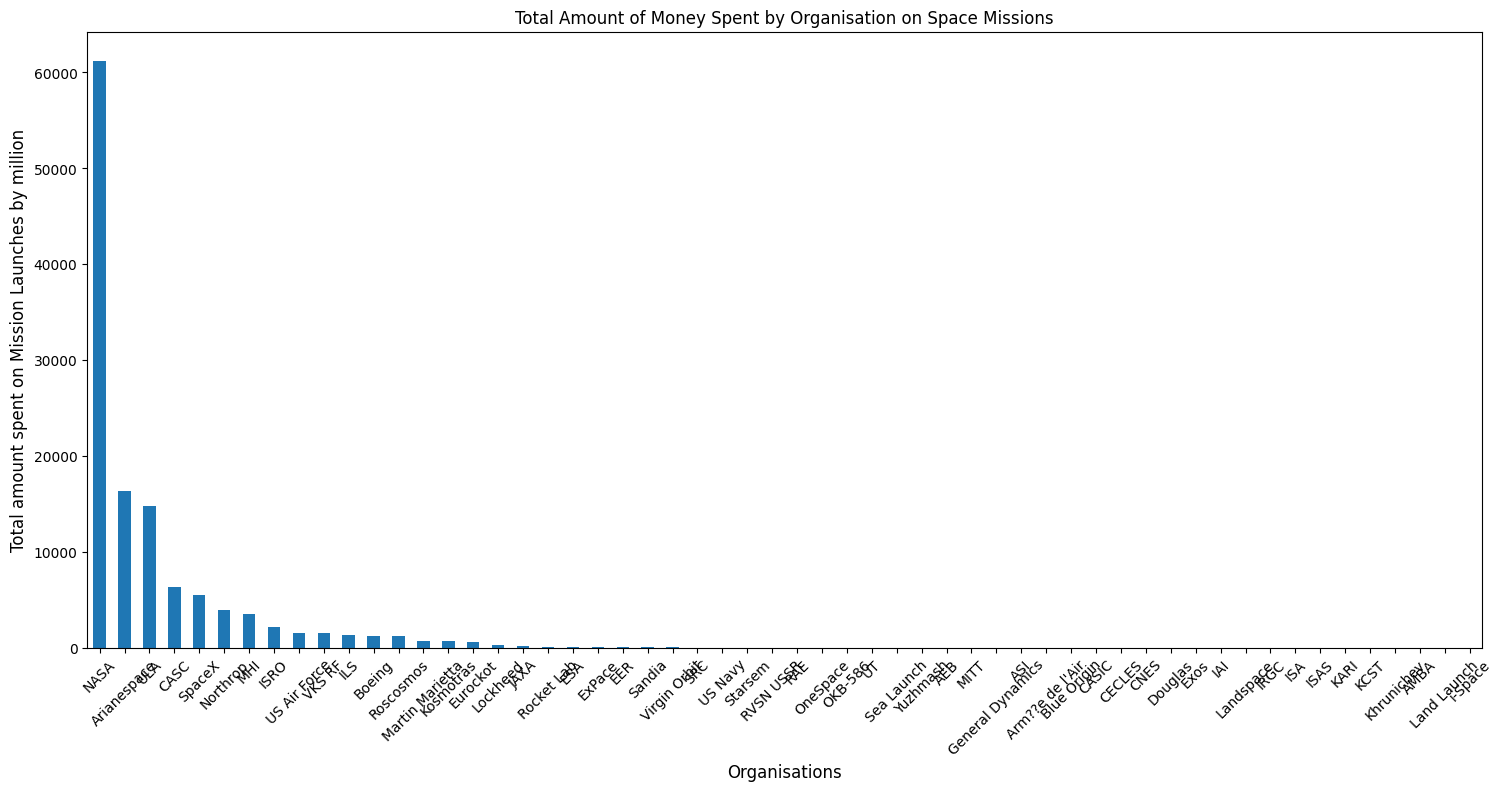

In [44]:
plt.figure(figsize=(18,8))
figy=total_spending.plot(kind='bar', title='Total Amount of Money Spent by Organisation on Space Missions')

figy.set_xlabel('Organisations', fontsize=12)
figy.set_ylabel('Total amount spent on Mission Launches by million', fontsize=12)

plt.tick_params(axis='x', labelrotation=45)

# Analyse the Amount of Money Spent by Organisation per Launch

In [45]:
per_launch=df_data.groupby(['Organisation','Mission_Status','Price']).size().reset_index(name='count')
per_launch.head()

,Organisation,Mission_Status,Price,count
0,Arianespace,Failure,37.00,1
1,Arianespace,Failure,200.00,1
2,Arianespace,Partial Failure,200.00,1
3,Arianespace,Success,37.00,13
4,Arianespace,Success,48.50,2


In [46]:
fig=px.sunburst(per_launch, path=(['Organisation','Mission_Status','Price']), values='count')
fig.show()

# Chart the Number of Launches per Year

In [47]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha3
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [48]:
df_data['Formatted Date'] = df_data['Date'].dt.strftime('%Y-%m-%d')

In [49]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha3,Formatted Date
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958-02-05
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958-02-01
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957-12-06
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957-11-03
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957-10-04


In [50]:
launches_per_year=df_data['Date'].dt.year

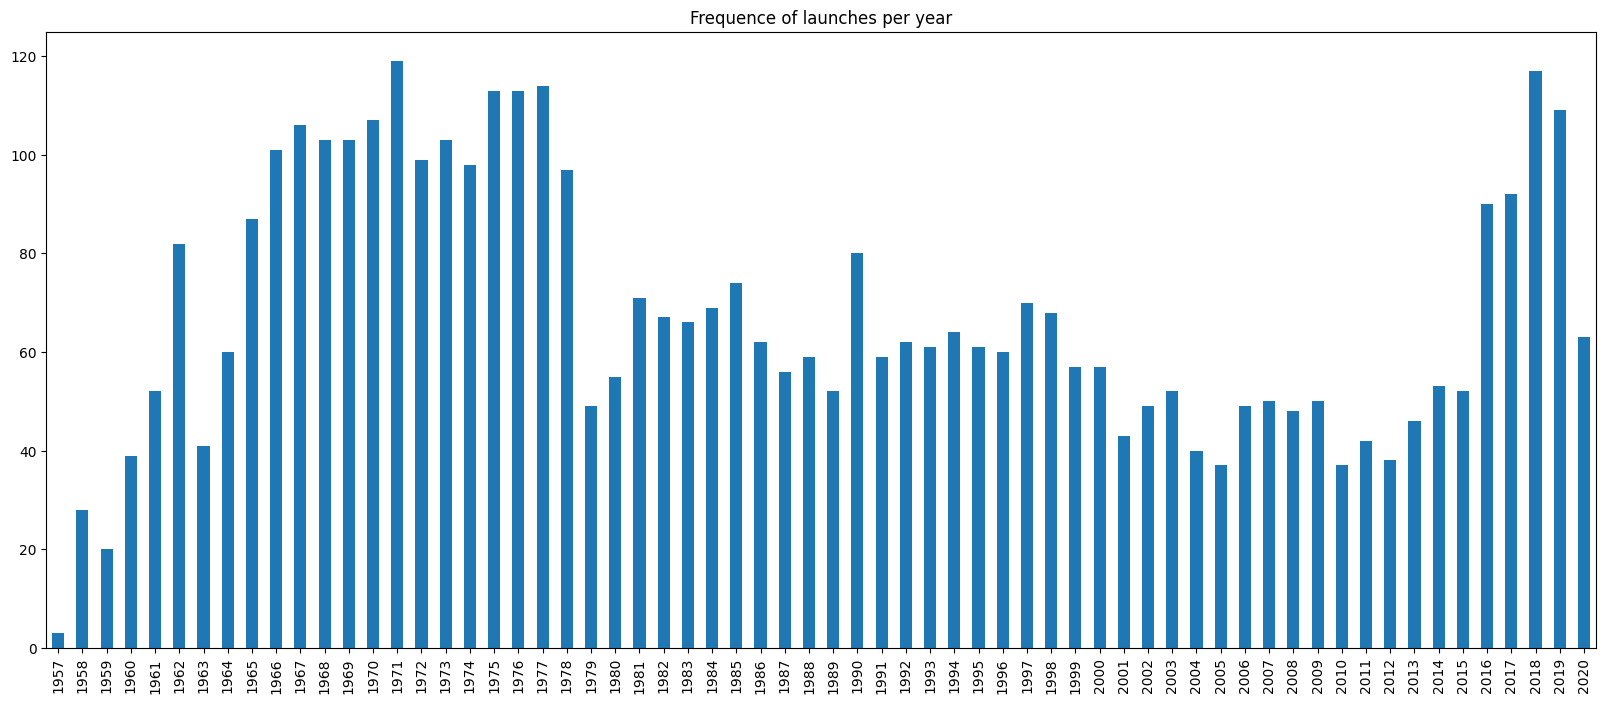

In [51]:
plt.figure(figsize=(20,8))
yearly=launches_per_year.value_counts().sort_index().plot(kind='bar', title='Frequence of launches per year')
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

<ipython-input-52-87c96b16ad64>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



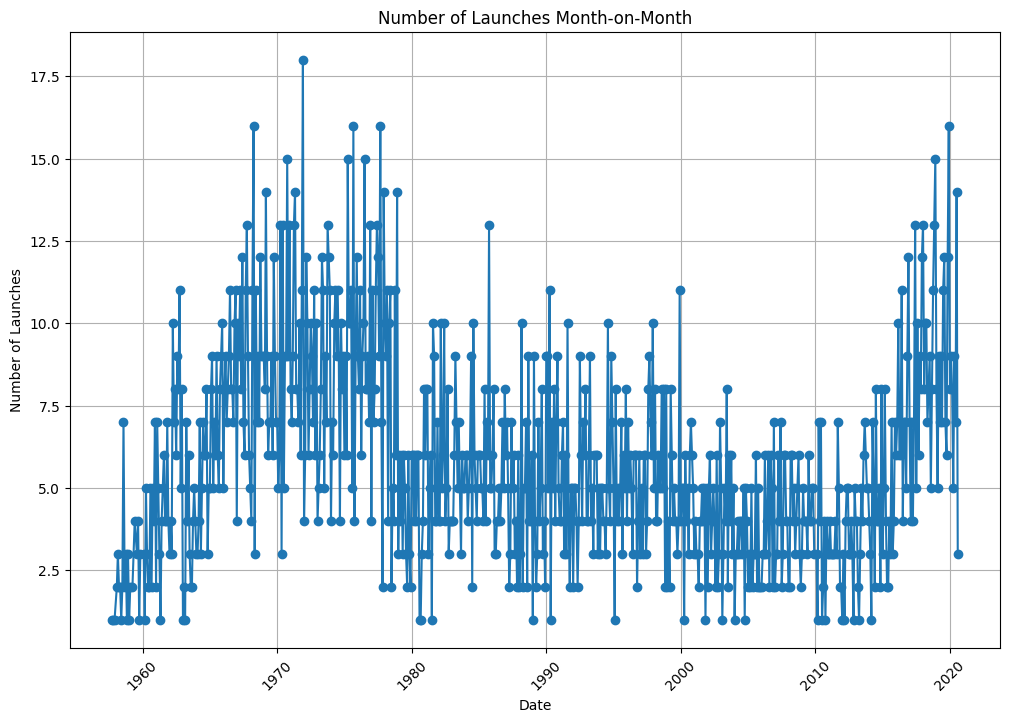

In [52]:

launches_per_month = df_data.groupby(df_data['Date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 8))
plt.plot(launches_per_month.index.to_timestamp(), launches_per_month.values, marker='o', linestyle='-')
plt.title('Number of Launches Month-on-Month')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [53]:
launches_per_month.idxmax()

Period('1971-12', 'M')

In [54]:
launches_per_month.idxmin()

Period('1957-10', 'M')

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [55]:
laun_per_month = df_data.groupby(df_data['Date'].dt.month).size()
laun_per_month

Date
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
dtype: int64

In [56]:
laun_per_month.max()


450

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [57]:
price_per_launch=df_data.groupby(df_data['Date'].dt.year)['Price'].value_counts(ascending=True)
price_per_launch

Date  Price
1964  63.23     2
1965  63.23     2
1966  59.00     3
1967  59.00     7
1968  59.00     8
               ..
2020  7.50      3
      29.15     5
      29.75     6
      48.50     6
      50.00    13
Name: Price, Length: 411, dtype: int64

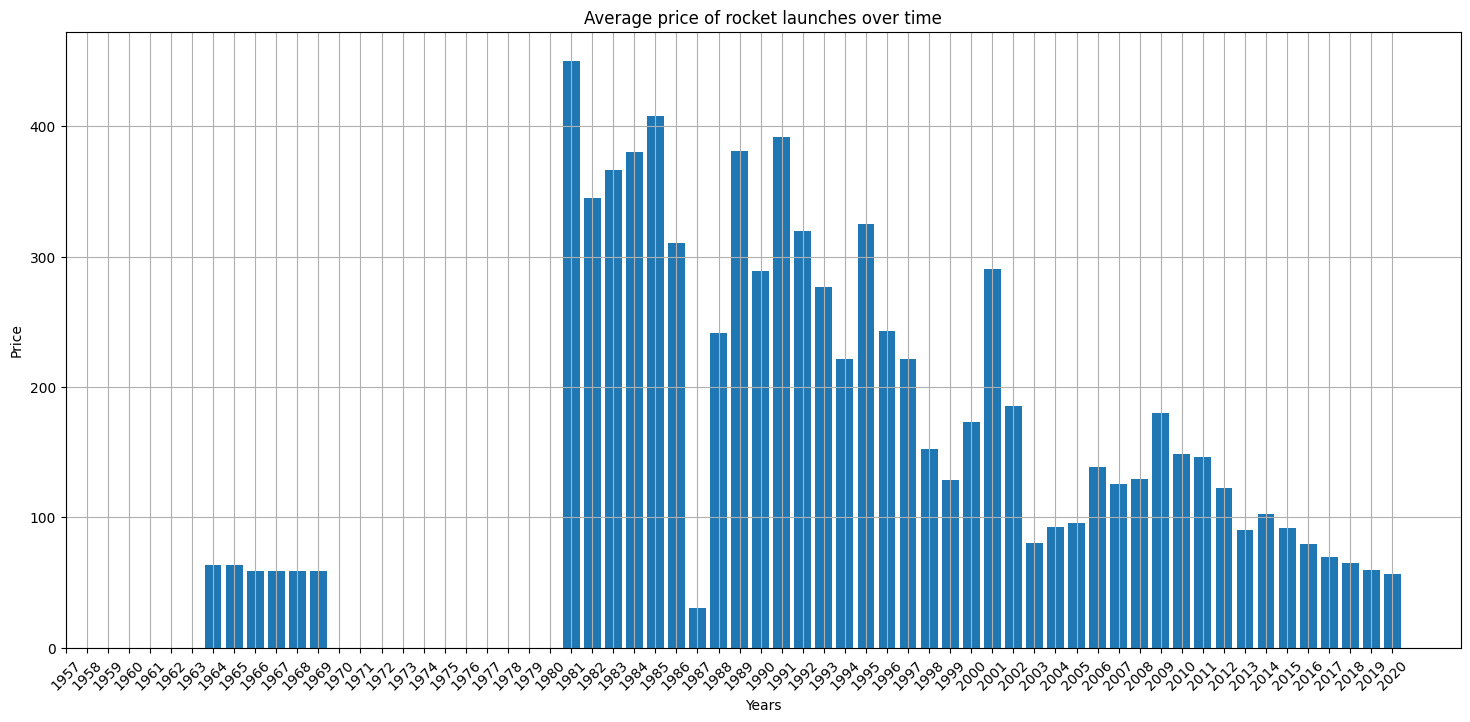

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df_data['Date'] = pd.to_datetime(df_data['Date'], format='%Y')

aggregated_data = df_data.groupby(df_data['Date'].dt.year).agg({'Price': 'mean'}).reset_index()


plt.figure(figsize=(18, 8))


plt.bar(aggregated_data['Date'], aggregated_data['Price'])
plt.title('Average price of rocket launches over time')
plt.xlabel('Years')
plt.ylabel('Price')
plt.xticks(aggregated_data['Date'], rotation=45)
plt.grid(True)
plt.show()


In [59]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha3,Formatted Date
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020-08-07
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020-08-06
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020-08-04
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020-07-30
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020-07-30


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

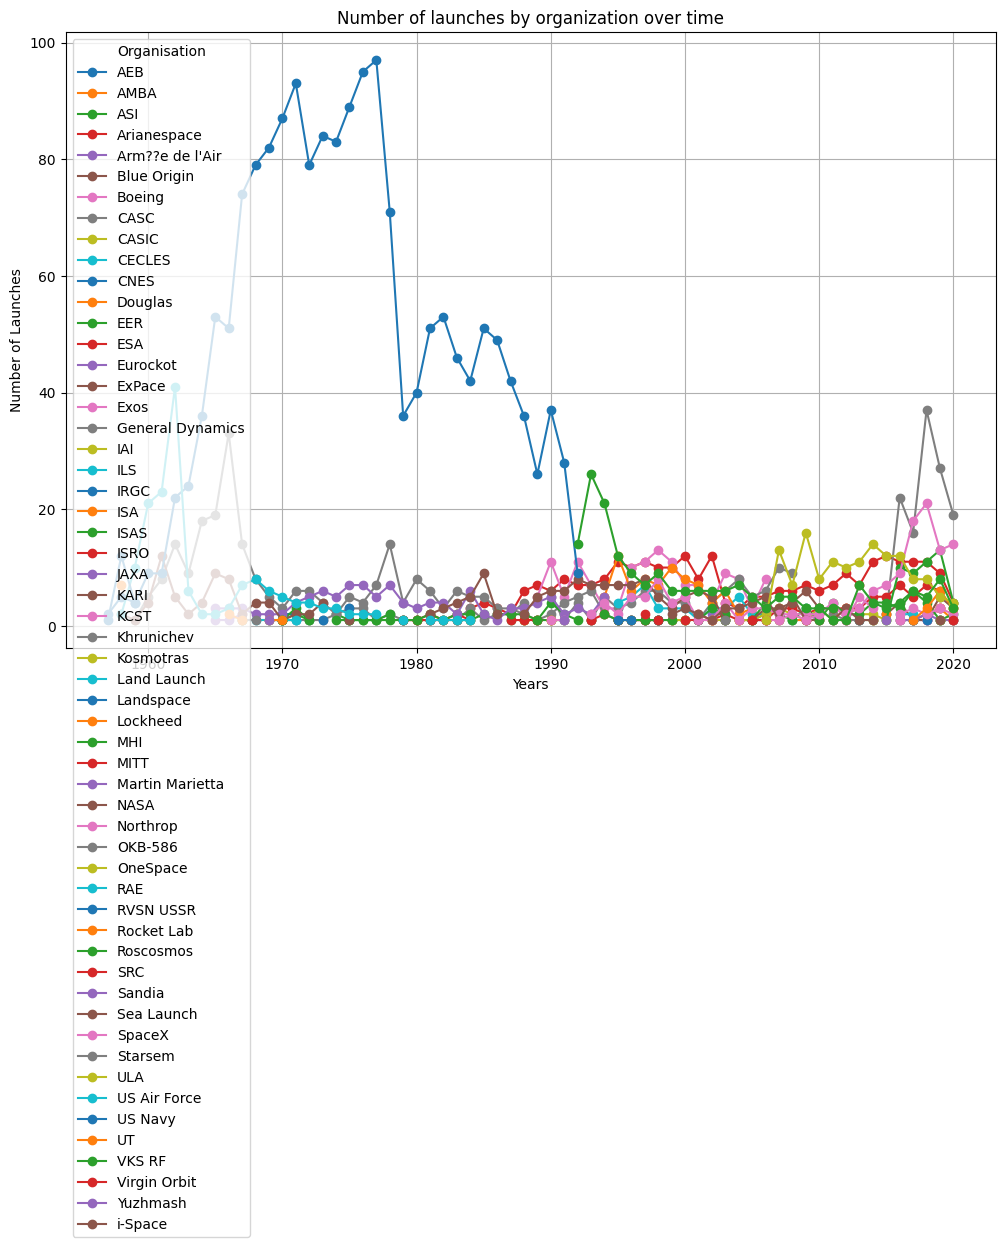

In [60]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%Y')
organization_launches = df_data.groupby([df_data['Organisation'], df_data['Date'].dt.year]).size().unstack().T

plt.figure(figsize=(12, 8))
organization_launches.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Number of launches by organization over time')
plt.xlabel('Years')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()

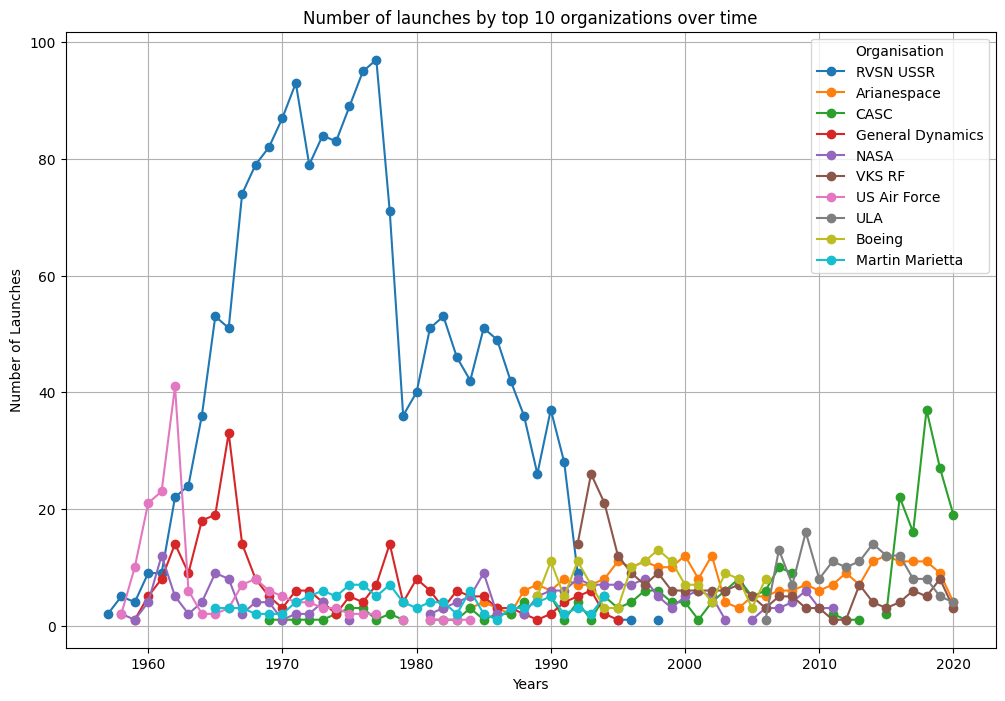

In [61]:


df_data['Date'] = pd.to_datetime(df_data['Date'])

organization_launches = df_data.groupby([df_data['Organisation'], df_data['Date'].dt.year]).size().unstack().T


top_10_organizations = organization_launches.sum().nlargest(10).index

top_10_organization_launches = organization_launches[top_10_organizations]

plt.figure(figsize=(12, 8))
top_10_organization_launches.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Number of launches by top 10 organizations over time')
plt.xlabel('Years')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

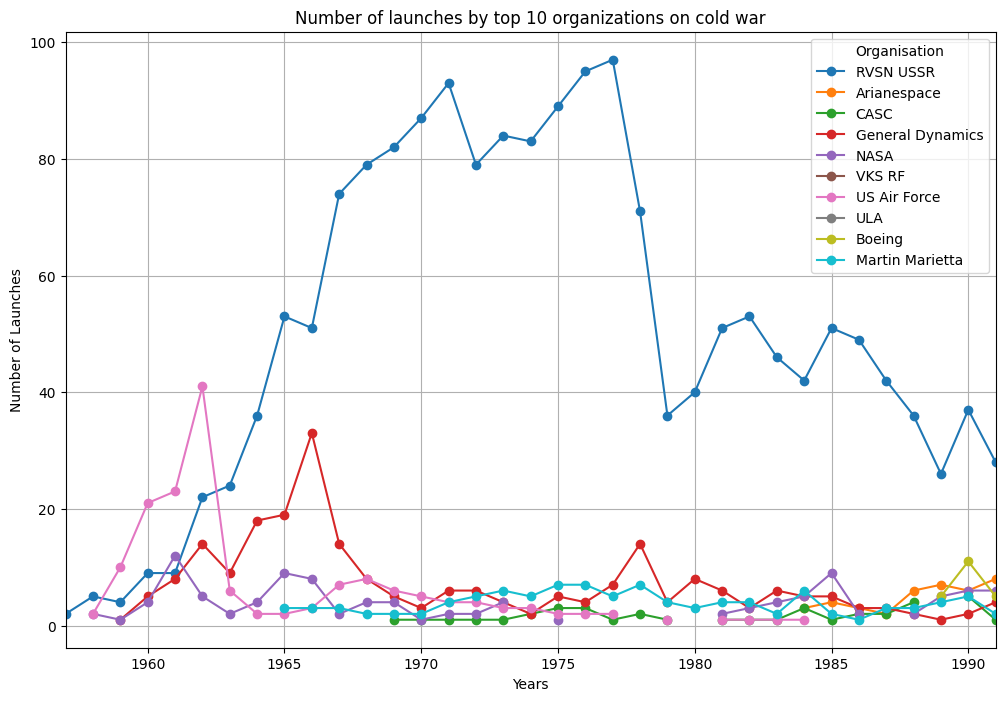

In [62]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

organization_launches = df_data.groupby([df_data['Organisation'], df_data['Date'].dt.year]).size().unstack().T


top_10_organizations = organization_launches.sum().nlargest(10).index

top_10_organization_launches = organization_launches[top_10_organizations]

plt.figure(figsize=(12, 8))
top_10_organization_launches.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Number of launches by top 10 organizations on cold war')
plt.xlabel('Years')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.xlim(1957, 1991)
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [63]:

launches_usa = df_data[df_data['Alpha3'] == 'USA'].shape[0]
launches_ussr = df_data[df_data['Alpha3'] == 'RUS'].shape[0]+df_data[df_data['Alpha3'] == 'KAZ'].shape[0]



In [64]:
launches_usa

1351

In [65]:
launches_ussr

2099

In [66]:
pie_data = pd.DataFrame({'Country': ['USA', 'USSR'], 'Launches': [launches_usa, launches_ussr]})
fig = px.pie(pie_data, values='Launches', names='Country', title='Number of Launches by Country')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [121]:

powerUSA_launches = df_data[df_data['Alpha3'] == 'USA'].groupby(df_data['Date'].dt.year).size()
powerUSSR_launches = df_data[df_data['Alpha3'].isin(['RUS', 'URS', 'USS'])].groupby(df_data['Date'].dt.year).size()



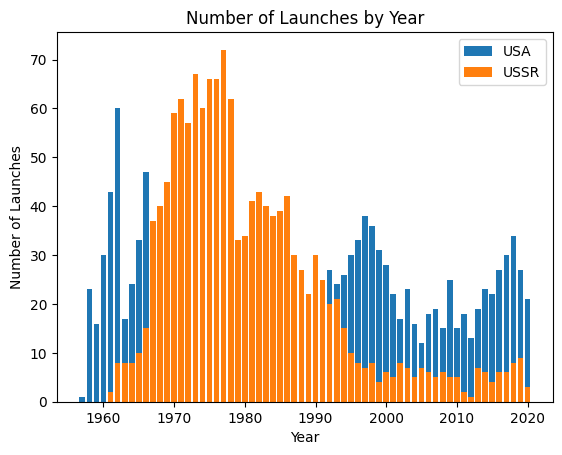

In [68]:
plt.bar(powerUSA_launches.index, powerUSA_launches, label='USA')
plt.bar(powerUSSR_launches.index, powerUSSR_launches, label='USSR')

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches by Year')
plt.legend()

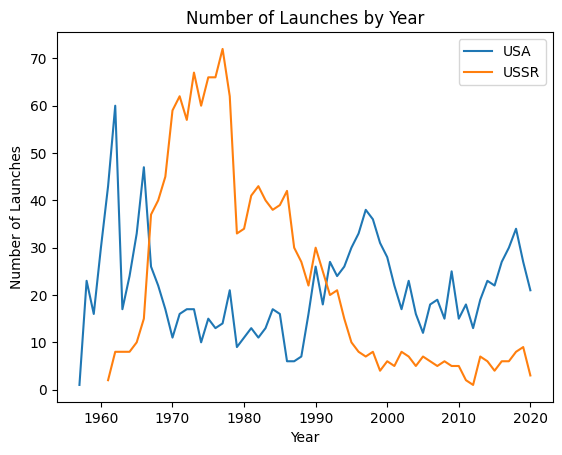

In [69]:
plt.plot(powerUSA_launches.index, powerUSA_launches, label='USA')
plt.plot(powerUSSR_launches.index, powerUSSR_launches, label='USSR')

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches by Year')
plt.legend()

plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [70]:
failure_number=df_data[df_data['Mission_Status'] == 'Failure'].groupby(df_data['Date'].dt.year).size()
failure_number

Date
1957     1
1958    20
1959     9
1960    20
1961    17
        ..
2016     2
2017     6
2018     2
2019     6
2020     6
Length: 64, dtype: int64

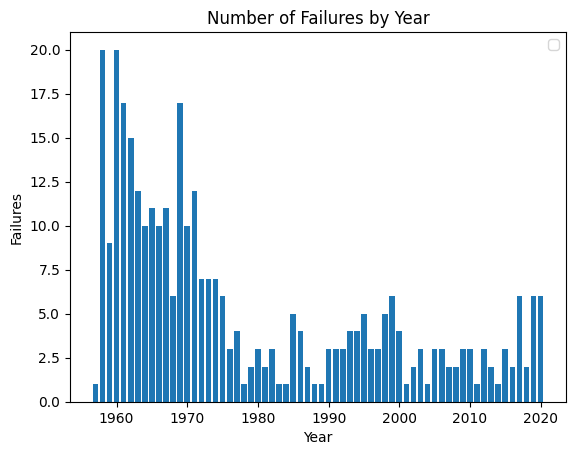

In [71]:
plt.bar(failure_number.index, failure_number.values)
plt.xlabel('Year')
plt.ylabel('Failures')
plt.title('Number of Failures by Year')
plt.legend()

plt.show()

In [72]:
unique_mission_status = df_data[df_data['Mission_Status']== 'Failure'].value_counts()
print(unique_mission_status)

Unnamed: 0.1  Unnamed: 0  Organisation     Location                                                                                 Date                       Detail                                                                Rocket_Status  Price   Mission_Status  Country             Alpha3  Formatted Date
11            11          ExPace           Site 95, Jiuquan Satellite Launch Center, China                                          2020-07-10 04:17:00+00:00  Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2                            StatusActive   28.30   Failure         China               CHN     2020-07-10        1
15            15          Rocket Lab       Rocket Lab LC-1A, M?hia Peninsula, New Zealand                                          2020-07-04 21:19:00+00:00  Electron/Curie | Pics Or It Didn??¦t Happen                           StatusActive   7.50    Failure         New Zealand         NZL     2020-07-04        1
913           913         ISRO             Second Launch 

In [73]:
df_data['Formatted Date'] = pd.to_datetime(df_data['Formatted Date'])
df_data['Year'] = df_data['Formatted Date'].dt.year
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha3,Formatted Date,Year
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958-02-05,1958
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958-02-01,1958
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957-12-06,1957
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957-11-03,1957
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957-10-04,1957


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [74]:


# Calculate the percentage of failures for each year
failures_by_year = (df_data[df_data['Mission_Status'] == 'Failure'].groupby('Year').size() / df_data.groupby('Year').size()) * 100

# Print the resulting percentage of failures by year
print(failures_by_year)




Year
1957   33.33
1958   71.43
1959   45.00
1960   51.28
1961   32.69
        ... 
2016    2.22
2017    6.52
2018    1.71
2019    5.50
2020    9.52
Length: 64, dtype: float64


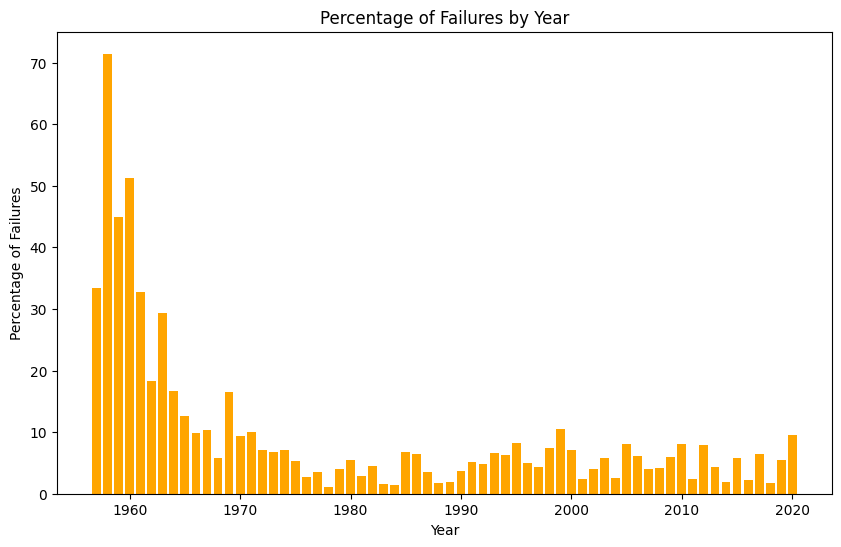

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(failures_by_year.index, failures_by_year.values, color='orange')
plt.title('Percentage of Failures by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Failures')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [82]:
all_launches = df_data.groupby(['Alpha3', df_data['Date'].dt.year]).size()
all_launches

Alpha3  Date
AUS     1967     1
        1968     1
        1969     1
        1970     2
        1971     1
                ..
USA     2016    27
        2017    30
        2018    34
        2019    27
        2020    21
Length: 397, dtype: int64

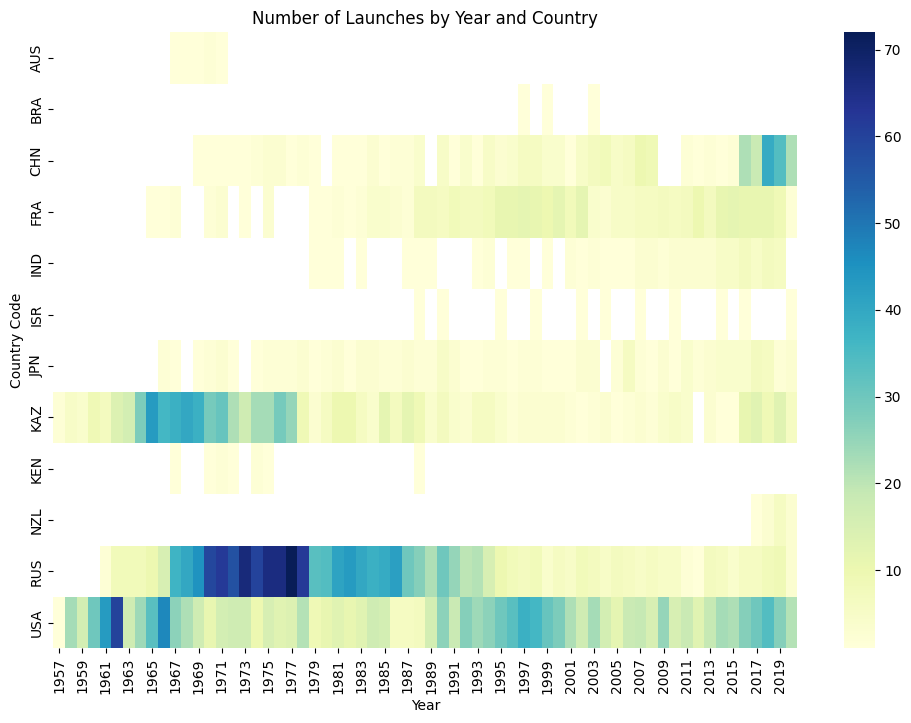

In [83]:
launches_by_year_country = all_launches.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(launches_by_year_country, cmap='YlGnBu')
plt.title('Number of Launches by Year and Country')
plt.xlabel('Year')
plt.ylabel('Country Code')
plt.show()

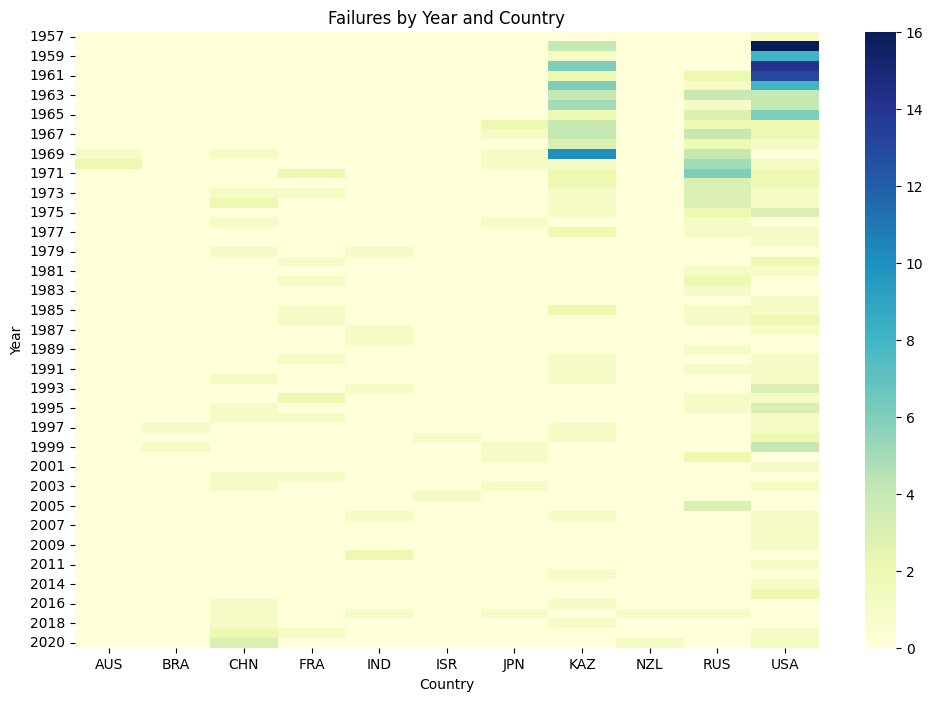

In [88]:
failures_pivot = df_data[df_data['Mission_Status'] == 'Failure'].pivot_table(index='Year', columns='Alpha3', values='Mission_Status', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(failures_pivot, cmap='YlGnBu')
plt.title('Failures by Year and Country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

<Axes: xlabel='Organisation,Date'>

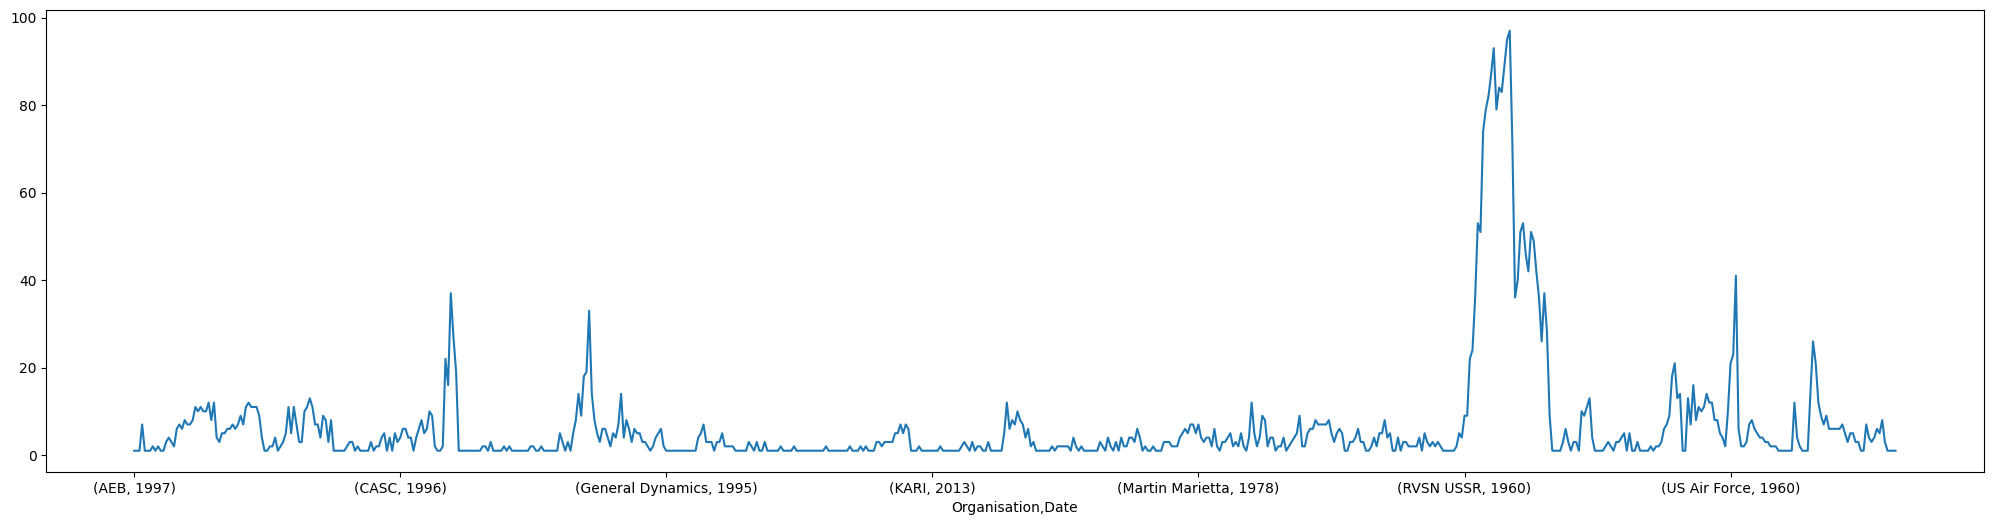

In [93]:
organisation_launches=df_data.groupby(['Organisation', df_data['Date'].dt.year]).size()
plt.figure(figsize=(25,6))
organisation_launches.plot()

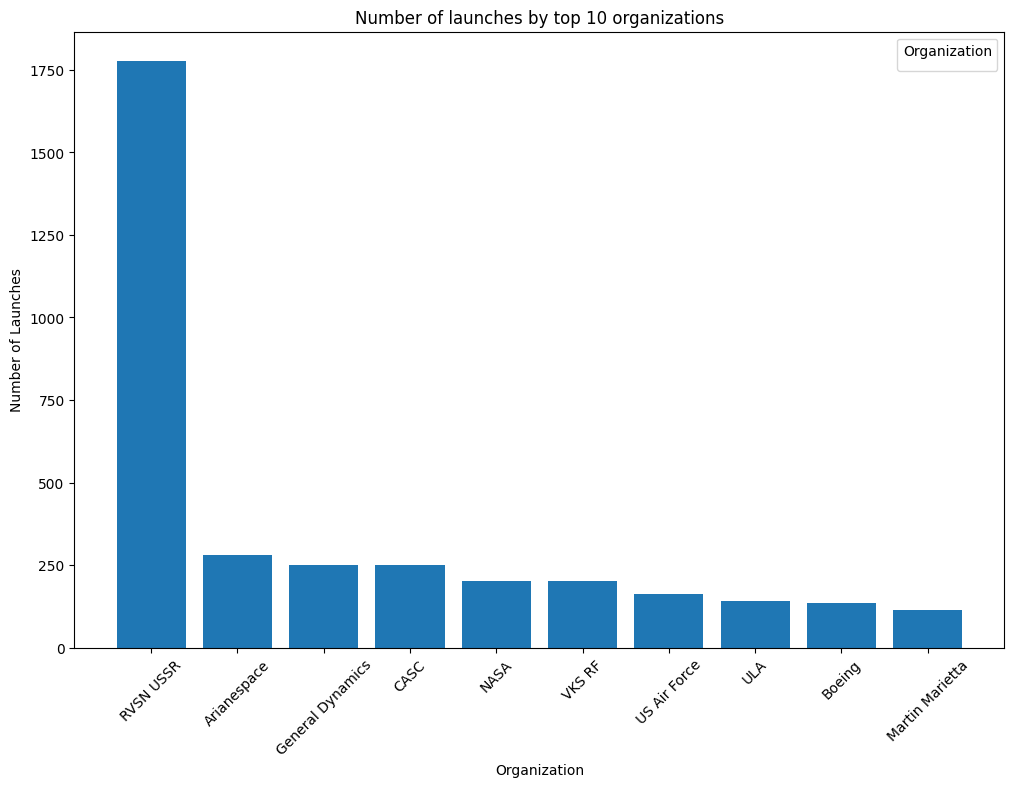

In [117]:
import matplotlib.pyplot as plt

# Recalculate the top 10 organizations based on the number of launches
organisation_launches = df_data.groupby('Organisation').size().sort_values(ascending=False)
top_10_organizations = organisation_launches.head(10)

# Create a bar graph for the number of launches by the top 10 organizations
plt.figure(figsize=(12, 8))
plt.bar(top_10_organizations.index, top_10_organizations.values)
plt.title('Number of launches by top 10 organizations')
plt.xlabel('Organization')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(title='Organization', bbox_to_anchor=(1, 1))
plt.show()



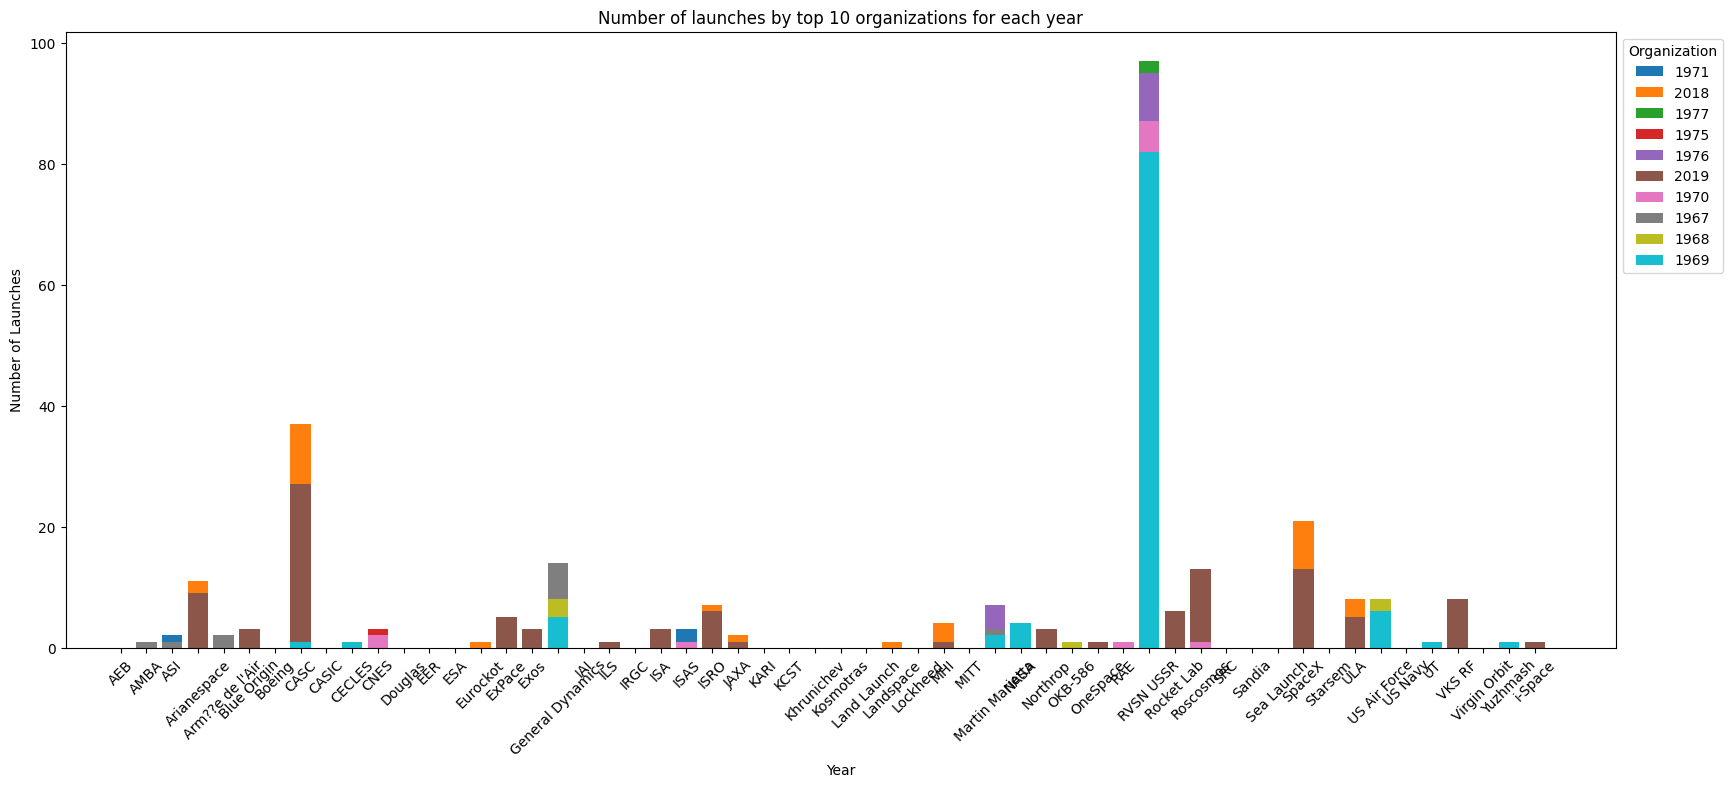

In [119]:
import matplotlib.pyplot as plt

# Recalculate the top 10 organizations for each year based on the number of launches
organisation_launches = df_data.groupby(['Organisation', df_data['Date'].dt.year]).size().unstack()
top_10_organizations = organisation_launches.sum().nlargest(10).index

# Create a bar graph for the number of launches by the top 10 organizations for each year
plt.figure(figsize=(20, 8))
for org in top_10_organizations:
    plt.bar(organisation_launches.index, organisation_launches[org], label=org)
plt.title('Number of launches by top 10 organizations for each year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(title='Organization', bbox_to_anchor=(1, 1))
plt.show()
